In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [60]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [61]:
print("Dataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

First few rows:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Cleaning

In [62]:
# Convert date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [63]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [64]:
df.columns = df.columns.str.lower()

In [65]:
boolean_columns = ['hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show']
for col in boolean_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

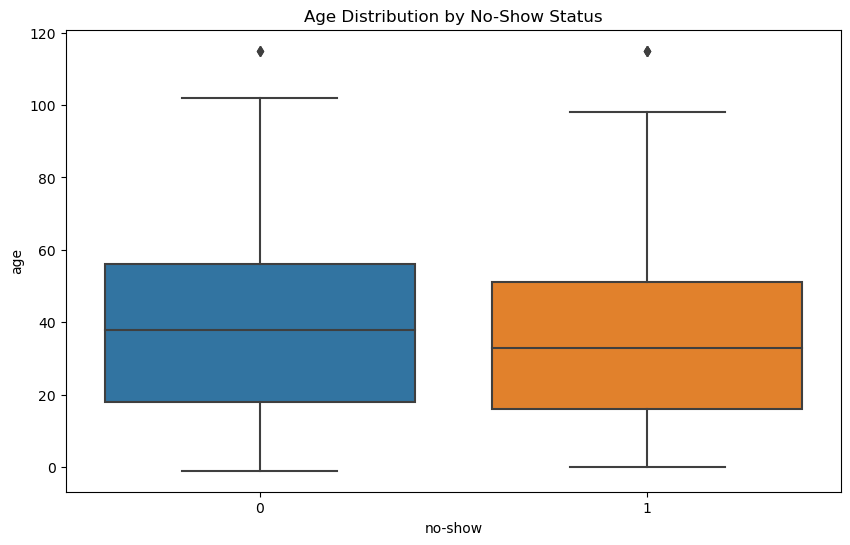

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='no-show', y='age', data=df)
plt.title('Age Distribution by No-Show Status')
plt.show()


In [67]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df['days_difference'] = (df['appointmentday'] - df['scheduledday']).dt.days


In [68]:
print(df.columns)
print(df['days_difference'].head())
print(df.dtypes)


Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show',
       'days_difference'],
      dtype='object')
0   -1
1   -1
2   -1
3   -1
4   -1
Name: days_difference, dtype: int64
patientid                      float64
appointmentid                    int64
gender                          object
scheduledday       datetime64[ns, UTC]
appointmentday     datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                   float64
diabetes                       float64
alcoholism                     float64
handcap                        float64
sms_received                   float64
no-show                          int64
days_difference                  int64
dtype: object


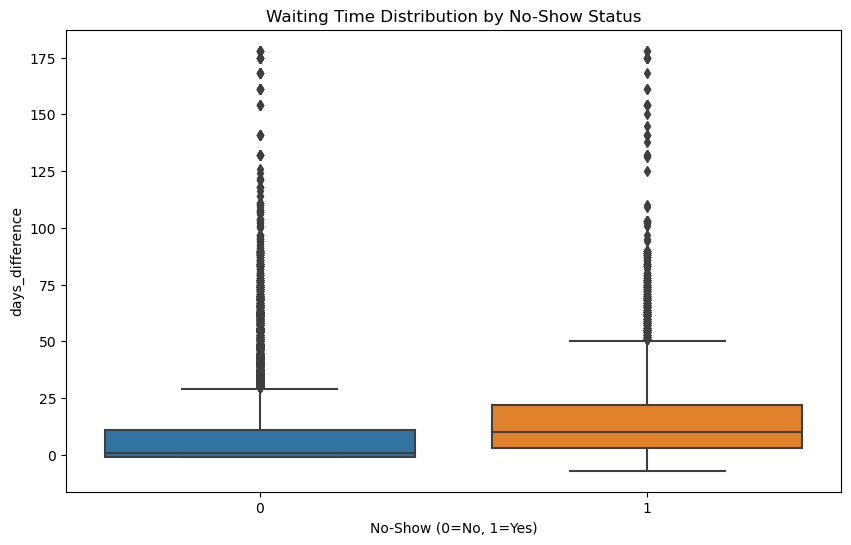

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='no-show', y='days_difference', data=df)
plt.title('Waiting Time Distribution by No-Show Status')
plt.xlabel('No-Show (0=No, 1=Yes)')
plt.show()

In [70]:
for i, condition in enumerate(['scholarship', 'hipertension', 'diabetes'], 1):
    print(f'Processing condition: {condition}')
    print(df[condition].unique())  # Confirm the column exists and is populated
    condition_noshow = df.groupby(condition)['no-show'].mean().reset_index()
    print(condition_noshow.head())



Processing condition: scholarship
[0 1]
   scholarship   no-show
0            0  0.198072
1            1  0.237363
Processing condition: hipertension
[nan]
Empty DataFrame
Columns: [hipertension, no-show]
Index: []
Processing condition: diabetes
[nan]
Empty DataFrame
Columns: [diabetes, no-show]
Index: []


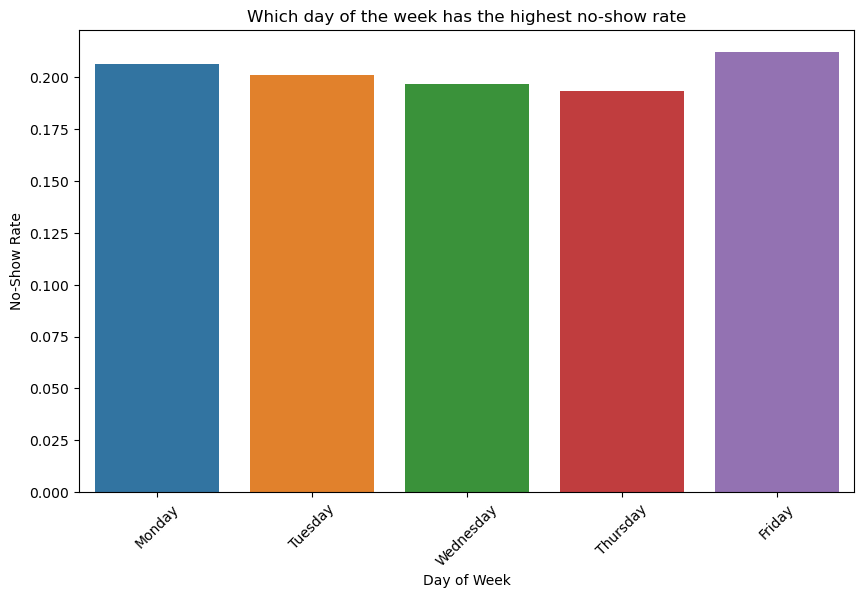

In [71]:
df.columns = df.columns.str.strip().str.lower()  
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['weekday'] = df['appointmentday'].dt.day_name()

weekday_noshow = df.groupby('weekday')['no-show'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='no-show', data=weekday_noshow, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.title('Which day of the week has the highest no-show rate')
plt.xlabel('Day of Week')
plt.ylabel('No-Show Rate')
plt.xticks(rotation=45)


plt.show()
